In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:09<00:00, 183MB/s]
100% 1.06G/1.06G [00:10<00:00, 114MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile("/content/dogs-vs-cats.zip",'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [7]:
#generators
train_ds= keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels= 'inferred',
    label_mode = 'int',
    batch_size=32, image_size=(256,256)
)

valid_ds= keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels= 'inferred',
    label_mode = 'int',
    batch_size=32, image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [8]:
#normalize
def process(image, label):
  image = tf.cast(image/256, tf.float32)
  return image, label

train_ds = train_ds.map(process)
valid_ds = valid_ds.map(process)

In [11]:
# create CNN Model

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding = 'valid', activation= 'relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding = 'valid', activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding = 'valid', activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(train_ds, epochs=10, validation_data=valid_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 79ms/step - accuracy: 0.6089 - loss: 0.6534 - val_accuracy: 0.7402 - val_loss: 0.5076
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 76ms/step - accuracy: 0.7487 - loss: 0.5031 - val_accuracy: 0.7670 - val_loss: 0.4900
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 71ms/step - accuracy: 0.8141 - loss: 0.4012 - val_accuracy: 0.7850 - val_loss: 0.5046
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 70ms/step - accuracy: 0.8772 - loss: 0.2806 - val_accuracy: 0.8000 - val_loss: 0.5897
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 68ms/step - accuracy: 0.9339 - loss: 0.1649 - val_accuracy: 0.7928 - val_loss: 0.7452
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 71ms/step - accuracy: 0.9616 - loss: 0.1045 - val_accuracy: 0.7884 - val_loss: 0.9277
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.9703 - loss: 0.0804 - val_accuracy: 0.7738 - val_loss: 1.1063
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 76ms/step - accuracy: 0.9814 - loss: 0.0584 - 

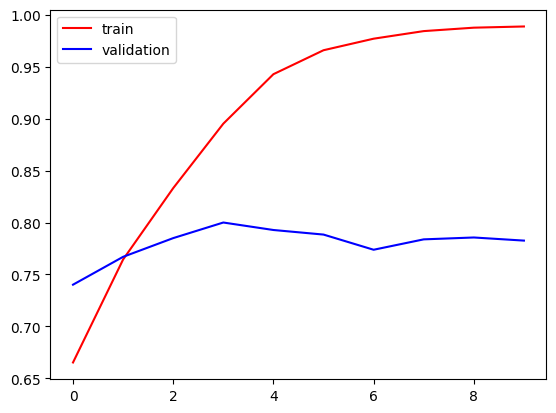

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

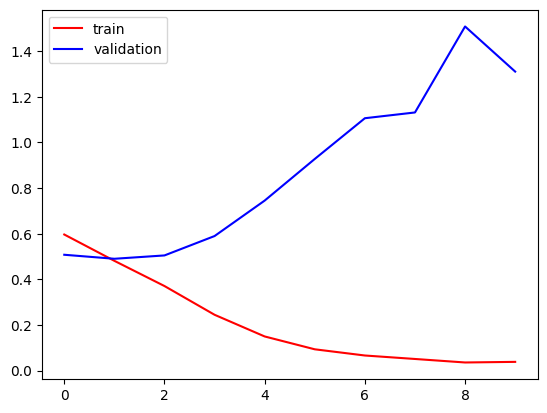

In [15]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()